In [1]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

In [2]:
data_groups = pd.read_json('top100groups80491907_1070.json')

### Берем топ 5 групп по участникам

In [3]:
top5 = data_groups.sort_values(by = 'count', ascending = False).head(5)

In [4]:
print(top5)

    count        id                title
36    214  45441631     ПРИКОЛЫ | Смеяка
15    191  26419239    Смейся до слёз :D
69    165  23064236       Четкие Приколы
49    154  27895931  Новинки Музыки 2017
40    141  40567146              Лайфхак


### Импорт данных о пользователях (пол, возраст)

In [28]:
API = 'https://api.vk.com/method/'
access_token = '8407958113ef793661fe2aaf3c828853ed23fdce76a418c7cabef03604f62ac020f9288605a674312fe50'

In [29]:
def requests_get(method, params):
    response = requests.get(API + method, params)
    result = response.json()
    return result

In [47]:
def import_data_users_per_group_id(group_id):
    params = {
        'group_id': group_id,
        'access_token': access_token,
        'v': 5.63,
        'count': 1000,
        'fields': 'sex, bdate'
    }
    requests_method = 'groups.getMembers'
    requests_result = requests_get(requests_method, params)
    result = requests_result['response']['items']
    for user in result:
        if 'deactivated' not in user.keys():
            if user['first_name'] is not None:
                del(user['first_name'])
            if user['last_name'] is not None:
                del(user['last_name'])
            if 'bdate' not in user.keys():
                user.setdefault('bdate')
        return result

### Формирование гистограммы распределение участников группы по полам

In [48]:
dict_all_users = {}
list_all_users = []
for i in top5['id']:
    z = import_data_users_per_group_id(i)
    dict_all_users[i] = z
    list_all_users += z

users = list_all_users
users

[{'deactivated': 'banned',
  'first_name': 'Давид',
  'id': 79,
  'last_name': 'Спектер',
  'sex': 2},
 {'deactivated': 'banned',
  'first_name': 'Tami',
  'id': 82,
  'last_name': 'Shalel',
  'sex': 2},
 {'bdate': '7.9',
  'first_name': 'Александра',
  'id': 177,
  'last_name': 'Максимова',
  'sex': 1},
 {'deactivated': 'banned',
  'first_name': 'Роман',
  'id': 219,
  'last_name': 'Акамёлков',
  'sex': 2},
 {'bdate': '16.2.1987',
  'first_name': 'Виктор',
  'id': 291,
  'last_name': 'Танчак',
  'sex': 2},
 {'deactivated': 'banned',
  'first_name': 'Дима',
  'id': 332,
  'last_name': 'Зеленцов',
  'sex': 2},
 {'bdate': '29.9.1995',
  'first_name': 'Галина',
  'id': 348,
  'last_name': 'Рязанцева',
  'sex': 1},
 {'deactivated': 'banned',
  'first_name': 'Анастасия',
  'id': 349,
  'last_name': 'Силюкова',
  'sex': 1},
 {'deactivated': 'banned',
  'first_name': 'Анна',
  'id': 425,
  'last_name': 'Войтенко',
  'sex': 1},
 {'bdate': '14.11.1985',
  'first_name': 'Мария',
  'id': 431,
  '

In [32]:
users_for_pd = []
for user in users:
    users_for_pd.append({'id': user['id'], 'sex': user['sex']})
users_for_pd

[{'id': 79, 'sex': 2},
 {'id': 82, 'sex': 2},
 {'id': 177, 'sex': 1},
 {'id': 219, 'sex': 2},
 {'id': 291, 'sex': 2},
 {'id': 332, 'sex': 2},
 {'id': 348, 'sex': 1},
 {'id': 349, 'sex': 1},
 {'id': 425, 'sex': 1},
 {'id': 431, 'sex': 1},
 {'id': 436, 'sex': 2},
 {'id': 479, 'sex': 1},
 {'id': 485, 'sex': 1},
 {'id': 532, 'sex': 2},
 {'id': 669, 'sex': 2},
 {'id': 756, 'sex': 1},
 {'id': 817, 'sex': 2},
 {'id': 819, 'sex': 1},
 {'id': 853, 'sex': 2},
 {'id': 885, 'sex': 1},
 {'id': 913, 'sex': 1},
 {'id': 914, 'sex': 2},
 {'id': 1112, 'sex': 1},
 {'id': 1132, 'sex': 1},
 {'id': 1159, 'sex': 1},
 {'id': 1355, 'sex': 1},
 {'id': 1507, 'sex': 1},
 {'id': 1526, 'sex': 2},
 {'id': 1636, 'sex': 2},
 {'id': 1690, 'sex': 2},
 {'id': 1691, 'sex': 2},
 {'id': 1699, 'sex': 2},
 {'id': 1791, 'sex': 2},
 {'id': 1811, 'sex': 2},
 {'id': 1834, 'sex': 1},
 {'id': 1889, 'sex': 1},
 {'id': 1964, 'sex': 1},
 {'id': 2335, 'sex': 1},
 {'id': 2389, 'sex': 2},
 {'id': 2395, 'sex': 2},
 {'id': 2412, 'sex': 1},

In [33]:
users_pd = pd.DataFrame(users_for_pd)
users_pd = users_pd.replace(to_replace=[1, 2], value=['F', 'M'])
users_pd

,id,sex
0,79,M
1,82,M
2,177,F
3,219,M
4,291,M
5,332,M
6,348,F
7,349,F
8,425,F
9,431,F


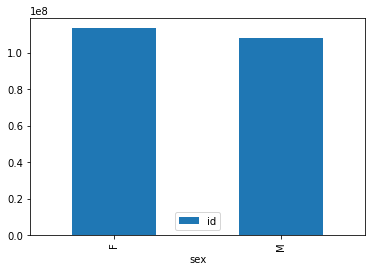

In [34]:
users_pd.groupby('sex').sum().plot.bar()

### Формирование гистограммы распределение участников группы по возрастам

In [35]:
users_for_pd_bdate = []
for user in users:
    if 'bdate' in user.keys():
        date_text = user['bdate']
        try:
            if date_text == datetime.strptime(date_text, "%d.%m.%Y").strftime('%d.%m.%Y'):
                users_for_pd_bdate.append({'id': user['id'], 'bdate': user['bdate']})
        except:
            pass
users_for_pd_bdate

[{'bdate': '14.11.1985', 'id': 431},
 {'bdate': '30.10.1980', 'id': 3186},
 {'bdate': '18.10.1993', 'id': 3756},
 {'bdate': '27.11.1985', 'id': 4043},
 {'bdate': '21.10.1988', 'id': 7639},
 {'bdate': '10.10.1985', 'id': 8247},
 {'bdate': '10.10.1988', 'id': 9993},
 {'bdate': '27.12.1982', 'id': 11983},
 {'bdate': '17.12.1987', 'id': 16755},
 {'bdate': '25.12.1965', 'id': 27062},
 {'bdate': '13.12.1988', 'id': 28910},
 {'bdate': '29.10.1987', 'id': 29131},
 {'bdate': '29.11.1995', 'id': 29481},
 {'bdate': '31.12.1987', 'id': 30632},
 {'bdate': '16.10.1984', 'id': 30812},
 {'bdate': '15.11.1987', 'id': 38042},
 {'bdate': '18.10.1988', 'id': 41815},
 {'bdate': '13.12.1985', 'id': 50225},
 {'bdate': '22.12.1986', 'id': 52638},
 {'bdate': '13.11.1978', 'id': 52990},
 {'bdate': '21.12.1988', 'id': 57210},
 {'bdate': '30.11.1986', 'id': 59551},
 {'bdate': '24.12.1988', 'id': 60113},
 {'bdate': '13.10.1987', 'id': 60197},
 {'bdate': '14.10.1985', 'id': 69511},
 {'bdate': '14.11.1986', 'id': 70

In [36]:
users_pd_bdate = pd.DataFrame(users_for_pd_bdate)
users_pd_bdate

,bdate,id
0,14.11.1985,431
1,30.10.1980,3186
2,18.10.1993,3756
3,27.11.1985,4043
4,21.10.1988,7639
5,10.10.1985,8247
6,10.10.1988,9993
7,27.12.1982,11983
8,17.12.1987,16755
9,25.12.1965,27062


In [37]:
users_pd_bdate.bdate = users_pd_bdate.bdate.apply(pd.to_datetime)
users_pd_bdate

,bdate,id
0,1985-11-14,431
1,1980-10-30,3186
2,1993-10-18,3756
3,1985-11-27,4043
4,1988-10-21,7639
5,1985-10-10,8247
6,1988-10-10,9993
7,1982-12-27,11983
8,1987-12-17,16755
9,1965-12-25,27062


In [38]:
now = datetime.strftime(datetime.now(), "%Y-%m-%d")
users_pd_bdate['now_date'] = now
users_pd_bdate.now_date = users_pd_bdate.now_date.apply(pd.to_datetime)
users_pd_bdate

,bdate,id,now_date
0,1985-11-14,431,2017-04-12
1,1980-10-30,3186,2017-04-12
2,1993-10-18,3756,2017-04-12
3,1985-11-27,4043,2017-04-12
4,1988-10-21,7639,2017-04-12
5,1985-10-10,8247,2017-04-12
6,1988-10-10,9993,2017-04-12
7,1982-12-27,11983,2017-04-12
8,1987-12-17,16755,2017-04-12
9,1965-12-25,27062,2017-04-12


from datetime import date

def get_age(birthday, today):
    age = today.year - birthday.year
    if today.month < birthday.month:
        age -= 1
    elif today.month == birthday.month and today.day < birthday.day:
        age -= 1
    return age

users_pd_bdate['age_years'] = get_age(users_pd_bdate['bdate'], users_pd_bdate['now_date'])

In [42]:
users_pd_bdate['age'] = ((users_pd_bdate['now_date'] - users_pd_bdate['bdate']).apply(lambda x: x/np.timedelta64(1,'D')))/365
users_pd_bdate

,bdate,id,now_date,age
0,1985-11-14,431,2017-04-12,31.430137
1,1980-10-30,3186,2017-04-12,36.473973
2,1993-10-18,3756,2017-04-12,23.498630
3,1985-11-27,4043,2017-04-12,31.394521
4,1988-10-21,7639,2017-04-12,28.493151
5,1985-10-10,8247,2017-04-12,31.526027
6,1988-10-10,9993,2017-04-12,28.523288
7,1982-12-27,11983,2017-04-12,34.315068
8,1987-12-17,16755,2017-04-12,29.339726
9,1965-12-25,27062,2017-04-12,51.331507


In [61]:
users_pd_bdate['age_group'] = 'до 15'
users_pd_bdate['age_group'][(users_pd_bdate['age'] > 10) & (users_pd_bdate['age'] < 16)] = '10-15'
users_pd_bdate['age_group'][(users_pd_bdate['age'] > 16) & (users_pd_bdate['age'] < 21)] = '16-20'
users_pd_bdate['age_group'][(users_pd_bdate['age'] > 21) & (users_pd_bdate['age'] < 31)] = '21-30'
users_pd_bdate['age_group'][(users_pd_bdate['age'] > 31) & (users_pd_bdate['age'] < 41)] = '31-40'
users_pd_bdate['age_group'][(users_pd_bdate['age'] > 41) & (users_pd_bdate['age'] < 81)] = '41-80'
users_pd_bdate['age_group'][users_pd_bdate['age'] > 80] = '80 и старше'
users_pd_bdate

/Users/mykolapashkovsky/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/mykolapashkovsky/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/mykolapashkovsky/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mykolapashkovsky/anacond

,bdate,id,now_date,age,age_group
0,1985-11-14,431,2017-04-12,31.430137,31-40
1,1980-10-30,3186,2017-04-12,36.473973,31-40
2,1993-10-18,3756,2017-04-12,23.498630,21-30
3,1985-11-27,4043,2017-04-12,31.394521,31-40
4,1988-10-21,7639,2017-04-12,28.493151,21-30
5,1985-10-10,8247,2017-04-12,31.526027,31-40
6,1988-10-10,9993,2017-04-12,28.523288,21-30
7,1982-12-27,11983,2017-04-12,34.315068,31-40
8,1987-12-17,16755,2017-04-12,29.339726,21-30
9,1965-12-25,27062,2017-04-12,51.331507,41-80


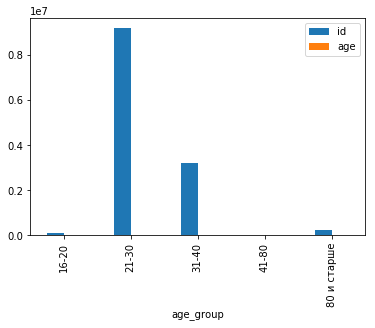

In [62]:
users_pd_bdate.groupby('age_group').sum().plot.bar()